# import thu vien

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import sklearn.neighbors as neighbors
import sklearn.model_selection as ms
import pandas as pd

# Đọc file txt

### Biến file txt thành csv để đọc dữ liệu và đặt tên HeaderName của từng cột data

In [2]:

dataframe = pd.read_csv('datingTestSet.txt', delimiter = "\t")
dataframe.columns = ['Fly', 'Videos game', 'Ice cream', 'Like']
print(dataframe)

       Fly  Videos game  Ice cream        Like
0    14488     7.153469   1.673904  smallDoses
1    26052     1.441871   0.805124   didntLike
2    75136    13.147394   0.428964   didntLike
3    38344     1.669788   0.134296   didntLike
4    72993    10.141740   1.032955   didntLike
..     ...          ...        ...         ...
994  11145     3.410627   0.631838  smallDoses
995  68846     9.974715   0.669787   didntLike
996  26575    10.650102   0.866627  largeDoses
997  48111     9.134528   0.728045  largeDoses
998  43757     7.882601   1.332446  largeDoses

[999 rows x 4 columns]


# 1.Tạo mảng numpy 

In [5]:
dataframe.head()
X = dataframe[['Fly', 'Videos game', 'Ice cream']]
Y = dataframe.Like


In [6]:
X_train, X_test, Y_train, Y_test = ms.train_test_split(X, Y, test_size=0.25, random_state=0)


# 2.Vẽ đồ thị dựa trên tập train 

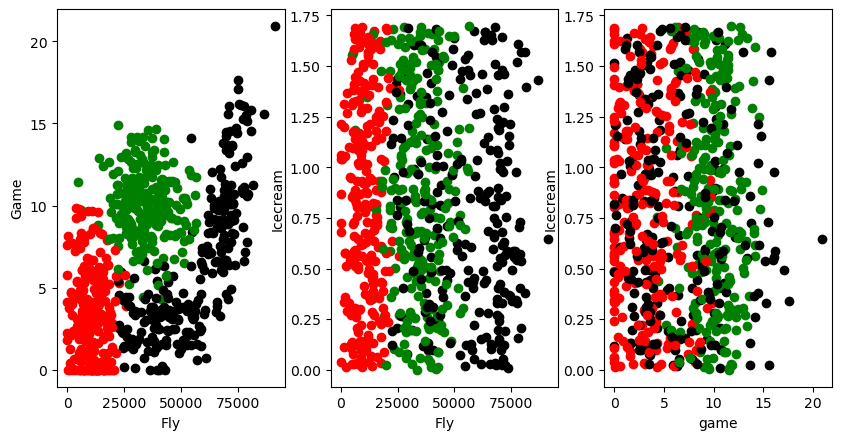

In [104]:
fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(10,5), dpi=100)
for i in X_train.index:
    if Y_train[i] == 'largeDoses':
        color = 'green'
    elif Y_train[i] == 'smallDoses':
        color = 'red'
    else:
        color = 'black'
    
    axes[0].scatter(X_train['Fly'][i], X_train['Videos game'][i], color=color, )
    
    axes[1].scatter(X_train['Fly'][i], X_train['Ice cream'][i], color=color)
    
    axes[2].scatter(X_train['Videos game'][i], X_train['Ice cream'][i], color=color)

axes[0].set_xlabel('Fly')
axes[0].set_ylabel('Game')
axes[1].set_xlabel('Fly')
axes[1].set_ylabel('Icecream')
axes[2].set_xlabel('game')
axes[2].set_ylabel('Icecream')
plt.show()


# 3.Train và đánh giá độ chính xác trên tập test

In [7]:
knn5 = neighbors.KNeighborsClassifier(n_neighbors=6) #6,9,15
knn5.fit(X_train, Y_train);

In [8]:
# dư đoán Y (người a) trên tập test dựa qua các đặc điểm của x_test(người b)
Y_pred = knn5.predict(X_test)

In [13]:
#Y_test là dự liệu đúng thực tế lấy trên tập dữ liệu 
# Bnhieu loai thi ma tran se la [so loai x so loai]
print(metrics.confusion_matrix(Y_test,Y_pred))
print("------------------------")
print( "Độ chính xác là: " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),4)))

[[70 16  0]
 [24 45 11]
 [ 0  1 83]]
------------------------
Độ chính xác là: 0.792


# 4.Tìm K sao cho độ chính xác cao nhất 

In [119]:
accs = []
k_grid = range(1,50,1)
for k in k_grid:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    score = metrics.accuracy_score(Y_test,Y_pred)
    accs.append(score)
    if score == 1: print('Accuracy 100% with k=', k)

# GridSearchCV 

In [111]:
# Parameter grid.
k_grid = np.arange(1,51,1)
parameters = {'n_neighbors':k_grid}

In [113]:
# Optimize the k.
# cv (cross validation): n_splits cannot be greater than the number of members in each class
gridCV = ms.GridSearchCV(neighbors.KNeighborsClassifier(), parameters)
gridCV.fit(X_train, Y_train)
best_k = gridCV.best_params_['n_neighbors']
print("K tốt nhất : " + str(best_k))

Best k : 42


## Test với K 

In [126]:
# Test with the best k.
KNN_best = neighbors.KNeighborsClassifier(n_neighbors=best_k)
KNN_best.fit(X_train, Y_train)
Y_pred = KNN_best.predict(X_test)
print( "Độ chính xác cao nhất với K "+str(best_k) + " là : " + str(np.round(metrics.accuracy_score(Y_test,Y_pred),3)))

Độ chính xác cao nhất với K 42 là : 0.808
